In [ ]:
import requests

url_1 = 'https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip'
file_name_1 = "horse-or-human.zip"

response = requests.get(url_2)

with open(file_name_1, 'wb') as f:
    f.write(response.content)
    
print('말-인간 학습 데이터셋 다운로드 완료')


url_2 = 'https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip'
file_name_2 = "validation-horse-or-human.zip"

response = requests.get(url_2)

with open(file_name_2, 'wb') as f:
    f.write(response.content)
    
print('말-인간 검증 데이터셋 다운로드 완료')

In [18]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile('./horse-or-human.zip', 'r')
zip_ref.extractall('horse-or-human')

zip_ref = zipfile.ZipFile('./validation-horse-or-human.zip', 'r')
zip_ref.extractall('validation-horse-or-human')

zip_ref.close()



In [19]:
# Directory with training horse pictures
train_horse_dir = os.path.join('horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('validation-horse-or-human/humans')


print(train_horse_dir)
print(train_human_dir)
print(validation_horse_dir)
print(validation_human_dir)

horse-or-human/horses
horse-or-human/humans
validation-horse-or-human/horses
validation-horse-or-human/humans


In [20]:
import tensorflow as tf

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        'horse-or-human/',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'validation-horse-or-human/',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [23]:
EPOCHS = 20

history = model.fit(
    train_generator,
    steps_per_epoch= 8,
    epochs = EPOCHS,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps=8,
)

Epoch 1/20


/Users/geonheekim/Desktop/study/python/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5049 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6831
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5781 - loss: 0.6858 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20


2024-04-15 10:34:18.669188: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/geonheekim/miniforge3/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-15 10:34:18.674325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 10:34:29.000101: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 7 of 8
2024-04-15 10:34:29.035111: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5417 - loss: 0.6853 - val_accuracy: 0.5000 - val_loss: 0.6787
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5469 - loss: 0.6903 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20


2024-04-15 10:34:41.214433: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 10:34:41.217097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5991 - loss: 0.6856 - val_accuracy: 0.5000 - val_loss: 0.6814
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6667 - loss: 0.6783 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20


2024-04-15 10:35:03.264049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 10:35:03.266429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5343 - loss: 0.6854 - val_accuracy: 0.5000 - val_loss: 0.6769
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6016 - loss: 0.6637 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20


2024-04-15 10:35:25.493353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 10:35:25.496420: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 10:35:35.844457: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 7 of 8
2024-04-15 10:35:35.878560: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5572 - loss: 0.6671 - val_accuracy: 0.5000 - val_loss: 0.6680
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5078 - loss: 0.6859 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/20


2024-04-15 10:35:48.393272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 10:35:48.396531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6414 - loss: 0.6671 - val_accuracy: 0.5000 - val_loss: 0.6591
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5156 - loss: 0.6890 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/20


2024-04-15 10:36:11.400901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 10:36:11.404329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6216 - loss: 0.6644 - val_accuracy: 0.5938 - val_loss: 0.6303
Epoch 14/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7031 - loss: 0.6397 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/20


2024-04-15 10:36:34.452254: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 10:36:34.454523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.6551 - loss: 0.6469 - val_accuracy: 0.8125 - val_loss: 0.5992
Epoch 16/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.6565 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/20


2024-04-15 10:36:57.218778: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 10:36:57.220969: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6465 - loss: 0.6450 - val_accuracy: 0.5273 - val_loss: 0.6319
Epoch 18/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6875 - loss: 0.6425 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/20


2024-04-15 10:37:20.171727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 10:37:20.173958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 10:37:30.617995: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 7 of 8
2024-04-15 10:37:32.111354: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7544 - loss: 0.6191 - val_accuracy: 0.5000 - val_loss: 0.6797
Epoch 20/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6797 - loss: 0.6137 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


2024-04-15 10:37:44.348967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 10:37:44.352358: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


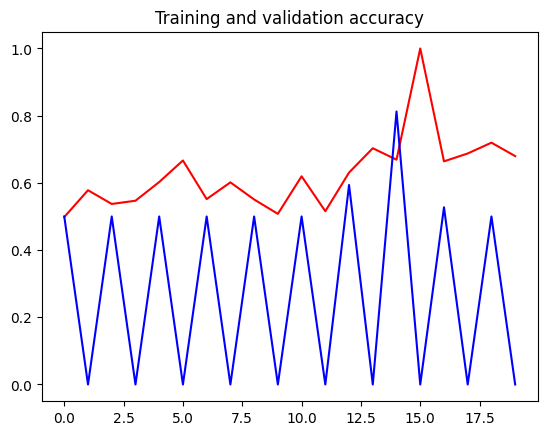

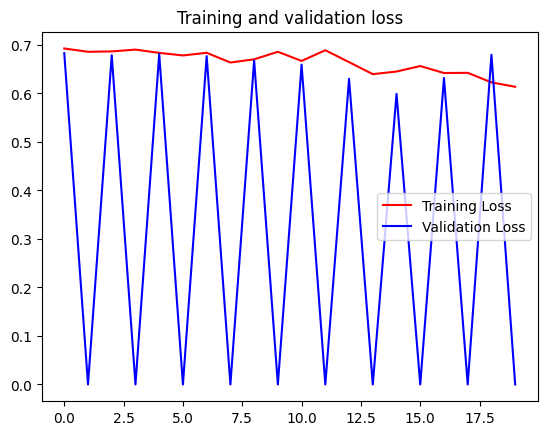

In [24]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()